In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import ElasticNetCV
import statsmodels.api as sm
import seaborn as sns

In [141]:
# read your download of the dataset if you edit the code
df = pd.read_csv('C:/Users/pisan/OneDrive/Desktop/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [143]:
# dummify variables
cat_cols = ['mainroad', 'guestroom', 'basement',
            'hotwaterheating', 'airconditioning', 'prefarea',
            'furnishingstatus']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [145]:
# make sure there is no missing values
df.isnull().sum()

price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
parking                            0
mainroad_yes                       0
guestroom_yes                      0
basement_yes                       0
hotwaterheating_yes                0
airconditioning_yes                0
prefarea_yes                       0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64

In [147]:
y = df['price'].astype(float)
x = df.drop('price',axis=1)
x.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [149]:
y.head()

0    13300000.0
1    12250000.0
2    12250000.0
3    12215000.0
4    11410000.0
Name: price, dtype: float64

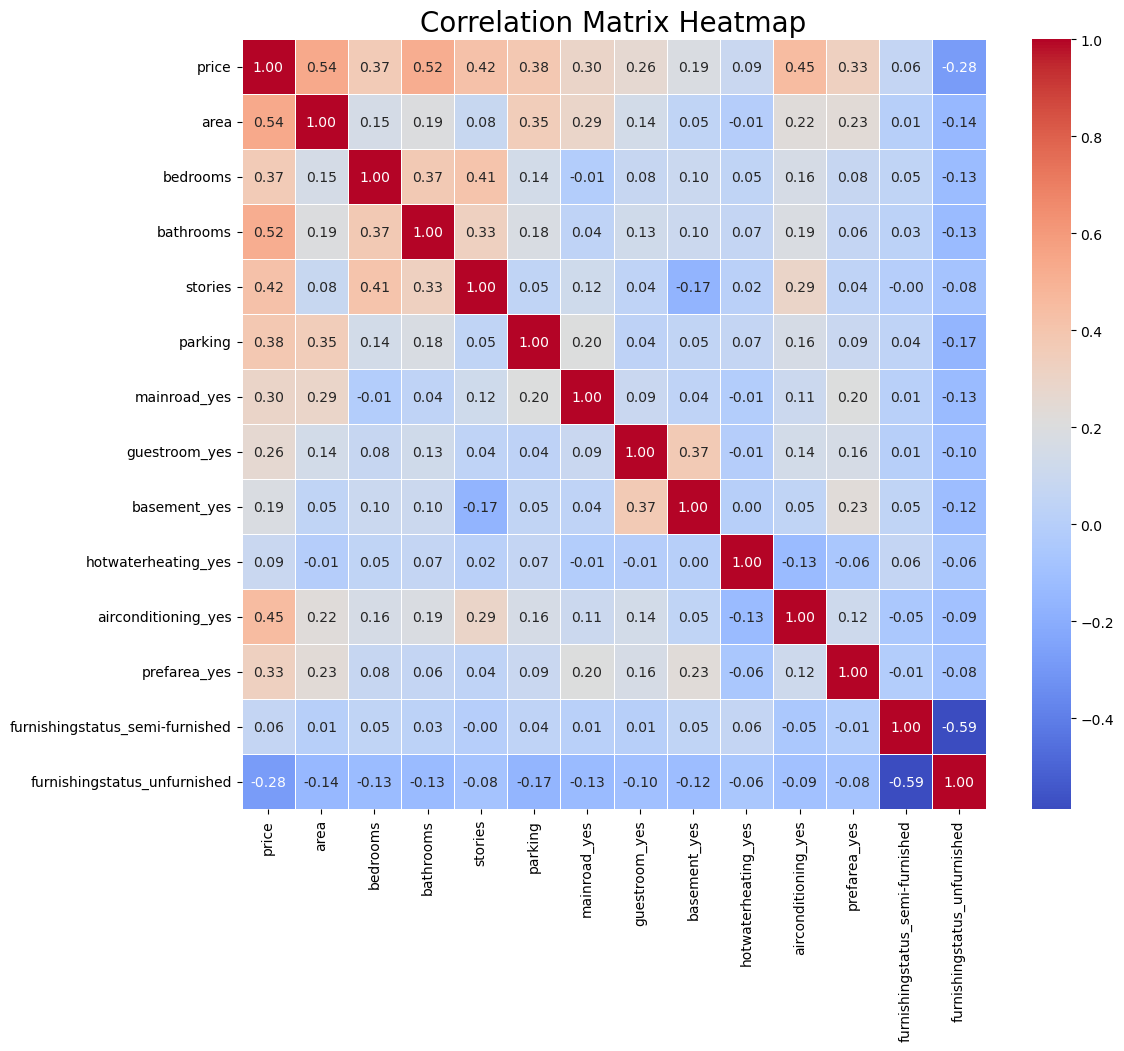

In [151]:
df_corr = df.corr()
plt.figure(figsize=(12, 10)) 
sns.heatmap(df_corr,
    annot=True,
    fmt=".2f",       
    linewidths=.6,
    cmap='coolwarm'
)

plt.title('Correlation Matrix Heatmap', fontsize=20) 
plt.show()

In [152]:
df_corr['price'].sort_values(ascending=False) 

price                              1.000000
area                               0.535997
bathrooms                          0.517545
airconditioning_yes                0.452954
stories                            0.420712
parking                            0.384394
bedrooms                           0.366494
prefarea_yes                       0.329777
mainroad_yes                       0.296898
guestroom_yes                      0.255517
basement_yes                       0.187057
hotwaterheating_yes                0.093073
furnishingstatus_semi-furnished    0.063656
furnishingstatus_unfurnished      -0.280587
Name: price, dtype: float64

In [153]:
# most significant area (size), bathroom, ac. (physical size and comfort features explain most of the price variance)

In [158]:
# get train and test split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=12, test_size=.2)
print(x_train.head(3))
print(y_train.head(3))
print(x_test.head(3))
print(y_test.head(3))

     area  bedrooms  bathrooms  stories  parking  mainroad_yes  guestroom_yes  \
332  5500         4          1        2        0          True           True   
206  5800         2          1        1        0          True           True   
236  2870         2          1        2        0          True           True   

     basement_yes  hotwaterheating_yes  airconditioning_yes  prefarea_yes  \
332          True                False                False         False   
206          True                False                 True         False   
236          True                False                False          True   

     furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
332                             True                         False  
206                             True                         False  
236                             True                         False  
332    3920000.0
206    4900000.0
236    4620000.0
Name: price, dtype: float64
     area  

In [160]:
mlr = LinearRegression()
mlr.fit(x_train, y_train)
y_pred = mlr.predict(x_test)
fitted_vals = mlr.predict(x_train)
residuals = y_train - fitted_vals

In [162]:
# Interpret Homoscedasticity (Constant Variance of Residuals) assumption: It seems the model doesn't have much pattern (maybe a little bit of cone shape, meaning log transfrom may be useful)

In [164]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nModel Performance:")
print(f"R² Score: {r2:.4f}")


Model Performance:
R² Score: 0.7277


In [166]:
# R^2: About 72.8% of the variance in house prices is explained by our predictors. May be higher with a transformation
# RMSE: On average, our model’s predictions are off by roughly $1.2 million from the true price. 

In [168]:
# we will now remove less significant features with forward selection

In [170]:
!pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Forward Selection
sfs_forward = SFS(mlr,
                  k_features='best',
                  forward=True,
                  floating=False,
                  scoring='r2',
                  cv=5)
sfs_forward.fit(x_train, y_train)
print("Forward-selected features:", list(sfs_forward.k_feature_names_))



Forward-selected features: ['area', 'bathrooms', 'stories', 'parking', 'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes', 'furnishingstatus_unfurnished']


In [171]:
# Forward-selected features
selected_features = ['area', 'bathrooms', 'stories', 'parking', 'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes', 'furnishingstatus_unfurnished']

# Create train/test subsets with selected features only
x_train_sel = x_train[selected_features]
x_test_sel = x_test[selected_features]

# Refit Linear Regression
mlr_sel = LinearRegression()
mlr_sel.fit(x_train_sel, y_train)

# Predictions and performance
y_pred_sel = mlr_sel.predict(x_test_sel)

r2_sel = r2_score(y_test, y_pred_sel)
rmse_sel = np.sqrt(mean_squared_error(y_test, y_pred_sel))

print("\nModel Performance (After Forward Selection):")
print(f"R² Score: {r2_sel:.4f}")





Model Performance (After Forward Selection):
R² Score: 0.7280


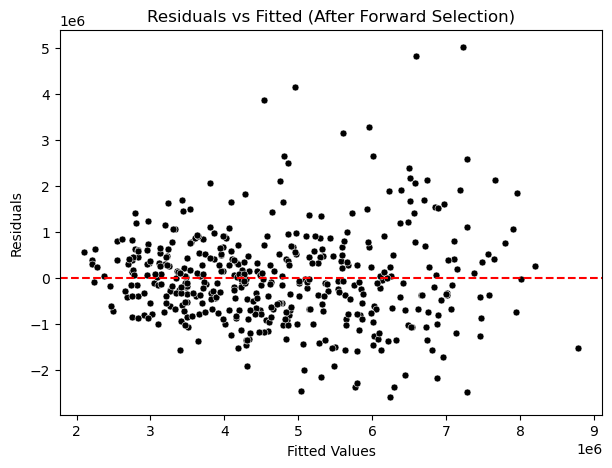

In [172]:
mlr_sel = LinearRegression()
mlr_sel.fit(x_train_sel, y_train)

# Compute fitted values and residuals for training data
fitted_vals_sel = mlr_sel.predict(x_train_sel)
residuals_sel = y_train - fitted_vals_sel

# Plot residuals vs fitted
plt.figure(figsize=(7, 5))
sns.scatterplot(x=fitted_vals_sel, y=residuals_sel, color="black", s=25)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (After Forward Selection)")
plt.show()


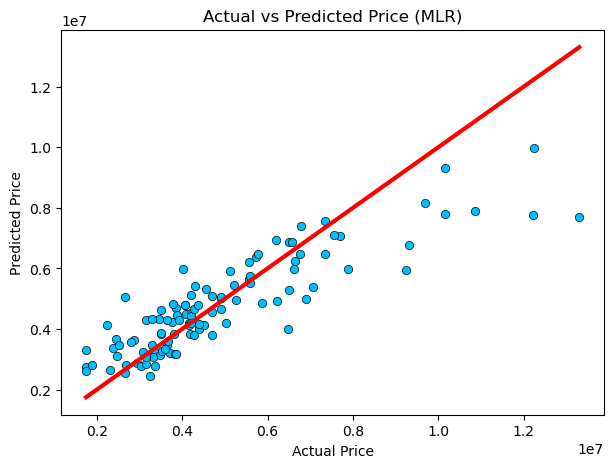

In [173]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred_sel, color="deepskyblue", edgecolor="black")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", lw=3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (MLR)")
plt.show()

In [174]:
# Interpret Output: test data seems to mostly follow our model line. But using a log/sqrt-transformation may better represent the data

In [175]:
# transform with log transformantion
df['log_price'] = np.log(df['price'])
y_log = df['log_price'].astype(float)
x_train_sel, x_test_sel, y_log_train, y_log_test = train_test_split(
    x[selected_features], 
    y_log, 
    random_state=12, 
    test_size=0.2
)
print(x_train_sel.head(3))
print(y_log_train.head(3))
print(y_log_test.head(3))

     area  bathrooms  stories  parking  mainroad_yes  guestroom_yes  \
332  5500          1        2        0          True           True   
206  5800          1        1        0          True           True   
236  2870          1        2        0          True           True   

     basement_yes  hotwaterheating_yes  airconditioning_yes  prefarea_yes  \
332          True                False                False         False   
206          True                False                 True         False   
236          True                False                False          True   

     furnishingstatus_unfurnished  
332                         False  
206                         False  
236                         False  
332    15.181602
206    15.404746
236    15.345905
Name: log_price, dtype: float64
298    15.250595
372    15.107494
14     16.039052
Name: log_price, dtype: float64


In [176]:
mlr_log = LinearRegression()
mlr_log.fit(x_train_sel, y_log_train)
y_log_pred = mlr_log.predict(x_test_sel)
r2_log = r2_score(y_log_test, y_log_pred)
rmse_log = np.sqrt(mean_squared_error(y_log_test, y_log_pred))

print("\nModel Performance (Log-Transformed Target):")
print(f"R² (log scale): {r2_log:.4f}")


Model Performance (Log-Transformed Target):
R² (log scale): 0.7511


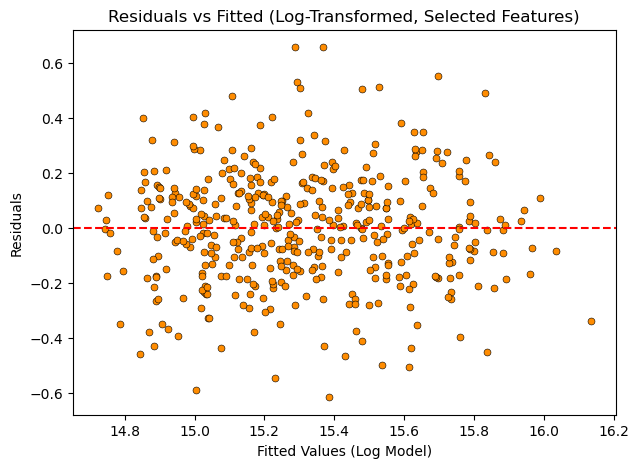

In [177]:
fitted_vals_log = mlr_log.predict(x_train_sel)
residuals_log = y_log_train - fitted_vals_log

# Plot residuals vs fitted
plt.figure(figsize=(7, 5))
sns.scatterplot(x=fitted_vals_log, y=residuals_log,
                color="darkorange", s=25, edgecolor="black")
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values (Log Model)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (Log-Transformed, Selected Features)")
plt.show()

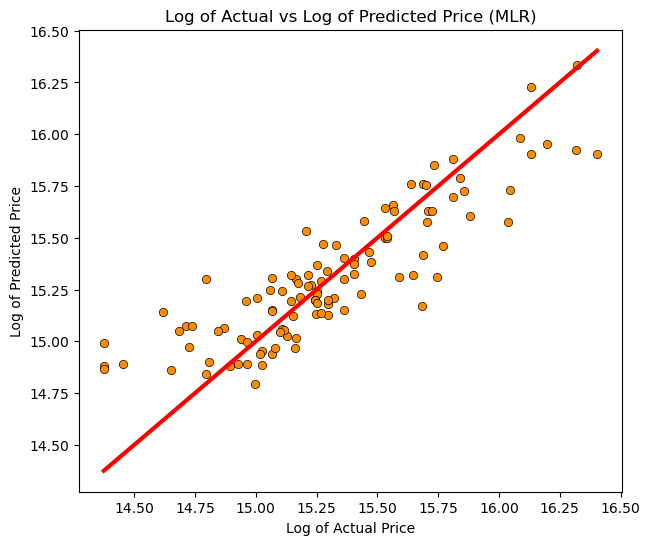

In [178]:
plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_log_test, y=y_log_pred, color="darkorange", edgecolor="black")
plt.plot([y_log_test.min(), y_log_test.max()],
         [y_log_test.min(), y_log_test.max()],
         color="red", lw=3)
plt.xlabel("Log of Actual Price")
plt.ylabel("Log of Predicted Price")
plt.title("Log of Actual vs Log of Predicted Price (MLR)")
plt.show()

In [179]:
# log transformation better meets homoscedasicity assumption

In [412]:
from sklearn.linear_model import ElasticNetCV
import numpy as np
from sklearn.metrics import mean_squared_error

lambdas = np.array([0.0001, 0.01, 0.1, 10, 100])  

m_lambda = ElasticNetCV(
    alphas=lambdas,    
    l1_ratio=0.5,      
    cv=10,             
    max_iter=10000,
    n_jobs=-1,         
    random_state=42
)

m_lambda.fit(x_train_sel, y_train)

best_lambda = m_lambda.alpha_
print("Best lambda:", best_lambda)
print("Coefficients:",m_lambda.coef_)
m_lambda.fit(x_train_sel, y_train)
coef_df = pd.DataFrame({
    "Feature": x_train_sel.columns,
    "Coefficient": m_lambda.coef_
})

coef_df = coef_df.assign(abs_coef=lambda d: d["Coefficient"].abs()).sort_values("abs_coef", ascending=False)

print(coef_df)

y_pred = m_lambda.predict(x_test_sel)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.4f}")

r_squared = m_lambda.score(x_test_sel, y_test)
print(f"r-squared: {r_squared}")

Best lambda: 0.01
Coefficients: [ 2.27473745e+02  8.47295311e+05  5.03510560e+05  2.34902322e+05
  3.51750117e+05  4.57677201e+05  3.29582575e+05  9.12161941e+05
  8.29140975e+05  5.19112018e+05 -3.83526536e+05]
                         Feature    Coefficient       abs_coef
7            hotwaterheating_yes  912161.940885  912161.940885
1                      bathrooms  847295.311033  847295.311033
8            airconditioning_yes  829140.974641  829140.974641
9                   prefarea_yes  519112.017984  519112.017984
2                        stories  503510.559646  503510.559646
5                  guestroom_yes  457677.201077  457677.201077
10  furnishingstatus_unfurnished -383526.536373  383526.536373
4                   mainroad_yes  351750.116979  351750.116979
6                   basement_yes  329582.574643  329582.574643
3                        parking  234902.321859  234902.321859
0                           area     227.473745     227.473745
MSE: 1444525850403.7209
r-square

In [337]:
# removed no featues, cv below

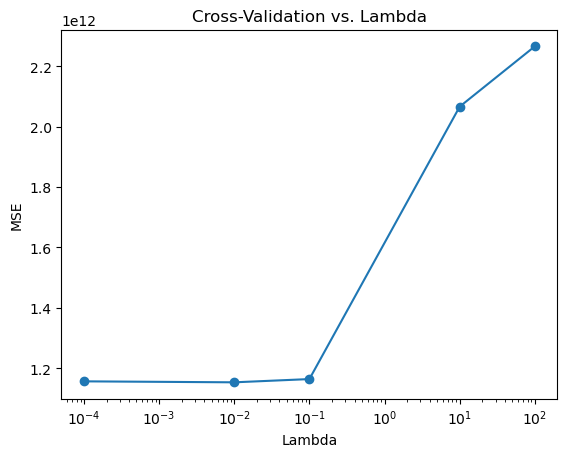

In [408]:
import matplotlib.pyplot as plt

plt.semilogx(m_lambda.alphas_, m_lambda.mse_path_.mean(axis=1), marker='o')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.title('Cross-Validation vs. Lambda')
plt.show()

In [ ]:
#initial tree

In [434]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


rgs = DecisionTreeRegressor(random_state=42)
rgs = rgs.fit(x_train_sel, y_train)
y_pred = rgs.predict(x_test_sel)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.4f}")

r_squared = rgs.score(x_test_sel, y_test)
print(f"r-squared: {r_squared}")


MSE: 2672148580275.2295
r-squared: 0.4961074127930605


In [ ]:
#set max depth

In [371]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error


rgs = DecisionTreeRegressor(max_depth = 3, random_state=42)
rgs = rgs.fit(x_train_sel, y_train)
y_pred = rgs.predict(x_test_sel)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.4f}")

r_squared = rgs.score(x_test_sel, y_test)
print(f"r-squared: {r_squared}")


MSE: 2483880182816.4634
r-squared: 0.5316095740819476


In [373]:
#Bagging

In [428]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

bagging_est = DecisionTreeRegressor(max_depth = 3, random_state=42)
bagging_model = BaggingRegressor(
    estimator=bagging_est,
    n_estimators=500,
    max_samples=1.0,  
    bootstrap=True,
    random_state=42)

bagging_model.fit(x_train_sel, y_train)
y_pred_bag = bagging_model.predict(x_test_sel)

mse_bag = mean_squared_error(y_test, y_pred_bag)
print(f"MSE: {mse_bag:.4f}")

r_squared = r2_score(y_test, y_pred_bag)
print(f"r-squared: {r_squared}")

MSE: 2147088184135.7600
r-squared: 0.595119138190219


In [377]:
#random Forests

In [454]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor


rf_rgs = RandomForestRegressor(n_estimators=500, max_depth=3, random_state=42)
rf_rgs.fit(x_train_sel, y_train)
y_pred_rf = rf_rgs.predict(x_test_sel)


mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"MSE: {mse_rf:.4f}")

r_squared = r2_score(y_test, y_pred_rf)
print(f"r-squared: {r_squared}")

MSE: 2147048910441.1931
r-squared: 0.5951265441120717


In [380]:
#boosting

In [458]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

gbm = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth = 3, random_state=42)
gbm.fit(x_train_sel, y_train)
y_pred_bst = gbm.predict(x_test_sel)

mse_bst = mean_squared_error(y_test, y_pred_bst)
print(f"MSE: {mse_bst:.4f}")

r_squared = r2_score(y_test, y_pred_bst)
print(f"r-squared: {r_squared}")

MSE: 1945952994823.9485
r-squared: 0.6330476170438339
